In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 읽기
ratings = pd.read_csv('data-files/ml-latest-small/ratings.csv')
movies = pd.read_csv('data-files/ml-latest-small/movies.csv')

In [6]:
# 데이터 확인 : 구조 확인 및 결측 값 없음 확인
ratings.info()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# 데이터 전처리 : 데이터프레임 병합
# pd.merge(ratings, movies, left_on='movieId', right_on='movieId')
ratings_movies = pd.merge(ratings, movies, on='movieId')

In [8]:
ratings_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [11]:
# 데이터 전처리 : 유사도 계산을 위해 사용자-영화 평점 테이블 만들기

# pd.pivot_table(ratings_movies, index='userId', columns='title', values='rating')
ratings_movies_matrix = \
    ratings_movies.pivot_table(index='userId', columns='title', values='rating')

In [12]:
ratings_movies_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
movies[movies['title'] == "'71 (2014)"]

,movieId,title,genres
8600,117867,'71 (2014),Action|Drama|Thriller|War


In [14]:
# missing value 처리 -> 0으로 변환

ratings_movies_matrix.fillna(0, inplace=True)
ratings_movies_matrix.head() 

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 코사인 유사도 계산을 위해 원래의 평점 행렬을 전치한 평점 행렬 만들기
transposed_ratings_movies_matrix = ratings_movies_matrix.T.copy()

In [ ]:
# 코사인 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

movie_sim = cosine_similarity(transposed_ratings_movies_matrix, transposed_ratings_movies_matrix)
user_sim = cosine_similarity(ratings_movies_matrix, ratings_movies_matrix)

In [23]:
movie_sim.shape, user_sim.shape

((9719, 9719), (610, 610))

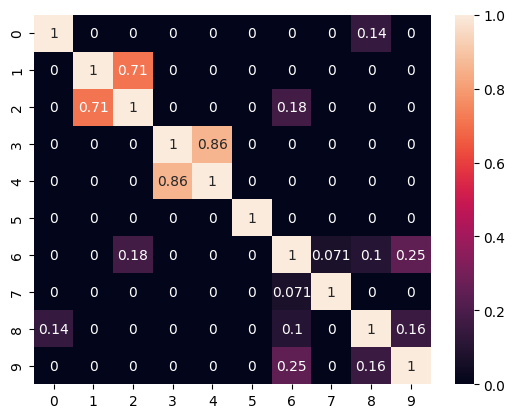

In [24]:
sns.heatmap(movie_sim[:10, :10], annot=True)
plt.show()

In [27]:
# 유사도 행렬을 데이터프레임으로 변환
movie_sim_df = pd.DataFrame(movie_sim, 
                            index=ratings_movies_matrix.columns,
                            columns=ratings_movies_matrix.columns)

user_sim_df = pd.DataFrame(user_sim, 
                           index=ratings_movies_matrix.index,
                           columns=ratings_movies_matrix.index)

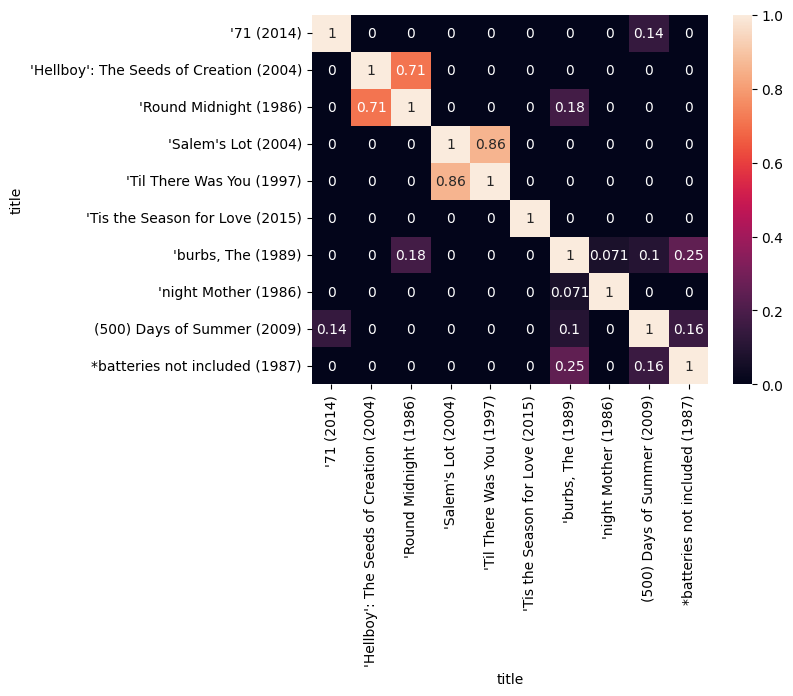

In [30]:
sns.heatmap(movie_sim_df.iloc[:10, :10], annot=True)
plt.show()

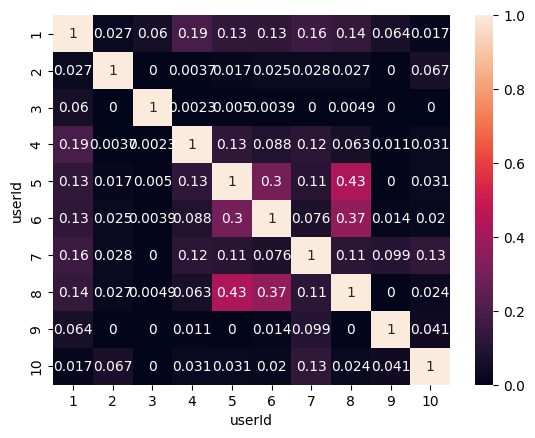

In [31]:
sns.heatmap(user_sim_df.iloc[:10, :10], annot=True)
plt.show()

In [35]:
# Batman Forever (1995)와 유사한 영화 찾기

movie_sim_df['Batman Forever (1995)'].sort_values(ascending=False)[1:10 + 1]

title
Batman (1989)                                                0.705639
True Lies (1994)                                             0.642744
Ace Ventura: Pet Detective (1994)                            0.620432
Cliffhanger (1993)                                           0.601867
Dances with Wolves (1990)                                    0.585934
Die Hard: With a Vengeance (1995)                            0.576758
Stargate (1994)                                              0.573540
Aladdin (1992)                                               0.566384
Clear and Present Danger (1994)                              0.563458
Interview with the Vampire: The Vampire Chronicles (1994)    0.560981
Name: Batman Forever (1995), dtype: float64

In [56]:
# 특정 사용자(여기서는 600번 사용자)가 높은 평점을 부여한 영화 목록 찾기
top_10_movies = ratings_movies_matrix.iloc[600,:].sort_values(ascending=False)[:10]
top_10_movies

title
Ratatouille (2007)                 5.0
Whiplash (2013)                    5.0
Princess Bride, The (1987)         5.0
Interstellar (2014)                5.0
WALL·E (2008)                      5.0
How to Train Your Dragon (2010)    5.0
Monsters, Inc. (2001)              5.0
Inside Out (2015)                  5.0
Departed, The (2006)               5.0
Usual Suspects, The (1995)         5.0
Name: 601, dtype: float64

In [57]:
# 600번 사용자가 높은 평점을 준 영화 (여기서는 interstellar)와 유사한 영화 찾기
top_similar_movies = movie_sim_df['Interstellar (2014)'].sort_values(ascending=False)[1:10 + 1]
top_similar_movies

title
Inception (2010)                    0.608150
Django Unchained (2012)             0.587284
Dark Knight Rises, The (2012)       0.582879
Edge of Tomorrow (2014)             0.570106
The Imitation Game (2014)           0.567939
Avengers, The (2012)                0.555597
Deadpool (2016)                     0.554588
The Martian (2015)                  0.546774
Guardians of the Galaxy (2014)      0.539885
Grand Budapest Hotel, The (2014)    0.539152
Name: Interstellar (2014), dtype: float64

In [ ]:
all_ratings = ratings_movies_matrix.iloc[600, :]
not_watched_movies = all_ratings[all_ratings == 0].index # 600번 사용자가 시청하지 않은 영화 목록
not_watched_movies = not_watched_movies.tolist()

False

In [ ]:
# 유사도가 높은 영화 중 보지 않은 영화 목록에 포함되지 않은 영화 찾기
movies_to_recommend = []
for m in top_similar_movies.index:
    if m in not_watched_movies:
        movies_to_recommend.append(m)

movies_to_recommend

In [ ]:
# 유사도가 높은 영화 중 보지 않은 영화 목록에 포함되지 않은 영화 찾기 2
movies_to_recommend2 = []
for m in top_10_movies.index:
    for m2 in movie_sim_df[m].sort_values(ascending=False)[1:11].index:
        if m2 in not_watched_movies:
            movies_to_recommend2.append(m2)

movies_to_recommend2

['Cars (2006)',
 'Kung Fu Panda (2008)',
 'Hangover, The (2009)',
 'Simpsons Movie, The (2007)',
 "No Man's Land (1987)",
 'Oh, God! You Devil (1984)',
 'Ogre, The (Unhold, Der) (1996)',
 'World Traveler (2001)',
 'Paranoid Park (2007)',
 'Moon Over Parador (1988)',
 'Once Upon a Time in the Midlands (2002)',
 'New Waterford Girl (1999)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 "Ferris Bueller's Day Off (1986)",
 'Groundhog Day (1993)',
 'Back to the Future (1985)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Indiana Jones and the Last Crusade (1989)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Breakfast Club, The (1985)',
 'Edge of Tomorrow (2014)',
 'Deadpool (2016)',
 'The Martian (2015)',
 'Grand Budapest Hotel, The (2014)',
 'Dark Knight, The (2008)',
 'Despicable Me (2010)',
 'How to Train Your Dragon 2 (2014)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)',
 'Shrek 2 (2004)',
 "Harry Potter and the Sorcerer's Stone (a.k.a. H

['Edge of Tomorrow (2014)',
 'Deadpool (2016)',
 'The Martian (2015)',
 'Grand Budapest Hotel, The (2014)']